<Figure size 1400x800 with 0 Axes>

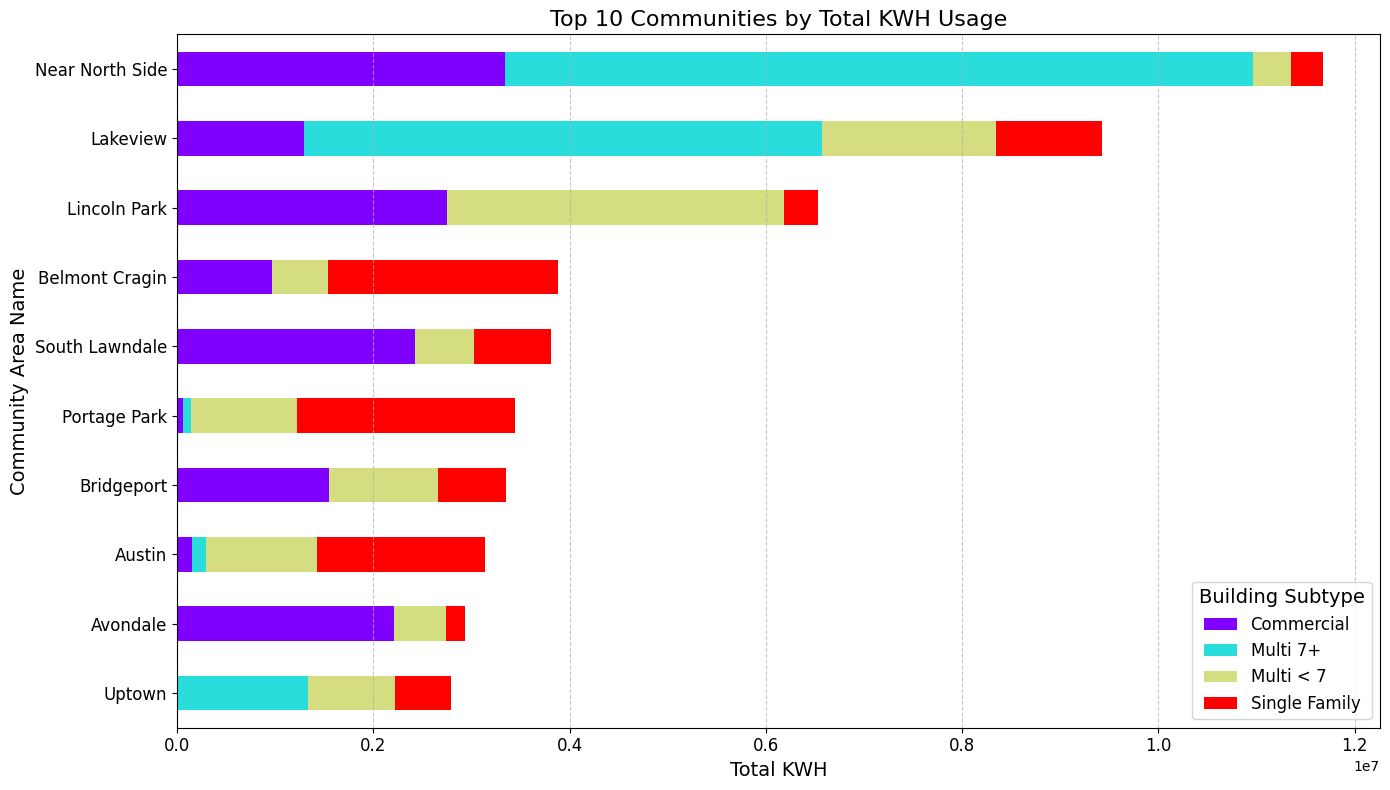

In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

df = pd.read_csv(r'C:\Users\Maple\Downloads\energy1.csv')

top_communities = df.groupby('COMMUNITY AREA NAME')['TOTAL KWH'].sum().nlargest(10).index
df_top = df[df['COMMUNITY AREA NAME'].isin(top_communities)]

# Pivot the data to get the sum of KWH for each building subtype within each community
df_pivot = df_top.pivot_table(values='TOTAL KWH', index='COMMUNITY AREA NAME', columns='BUILDING_SUBTYPE', aggfunc='sum', fill_value=0)
df_pivot['Total'] = df_pivot.sum(axis=1)
df_pivot = df_pivot.sort_values(by='Total', ascending=True)
df_pivot.drop(columns='Total', inplace=True)

# Create plot
plt.figure(figsize=(14, 8))
df_pivot.plot(kind='barh', stacked=True, colormap='rainbow', figsize=(14, 8))

plt.title('Top 10 Communities by Total KWH Usage', fontsize=16)
plt.xlabel('Total KWH', fontsize=14)
plt.ylabel('Community Area Name', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Building Subtype', fontsize=12, title_fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()